In [1]:
# Importing all impportant libraries which will be in use
import pandas as pd
import numpy as np

### Importing Train Dataset

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
train.shape

(30000, 24)

In [5]:
train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [6]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [7]:
null_columns=[features for features in train.columns if train[features].isnull().sum()>1]

In [8]:
for feature in null_columns:
    print(feature, np.round(train[feature].isnull().mean(),4), '%missing values')

Gender 0.0018 %missing values
Income (USD) 0.1525 %missing values
Income Stability 0.0561 %missing values
Type of Employment 0.2423 %missing values
Current Loan Expenses (USD) 0.0057 %missing values
Dependents 0.0831 %missing values
Credit Score 0.0568 %missing values
Has Active Credit Card 0.0522 %missing values
Property Age 0.1617 %missing values
Property Location 0.0119 %missing values
Loan Sanction Amount (USD) 0.0113 %missing values


In [9]:
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [11]:
train.shape

(30000, 24)

In [12]:
# Removing the Unneccesary columns
train.drop(['Customer ID', 'Name'], axis=1, inplace=True)

## Visualization 

In [13]:
import sweetviz as sv

In [14]:
report = sv.analyze(train)

                                             |                                             | [  0%]   00:00 ->…

In [15]:
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Seaborn  

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

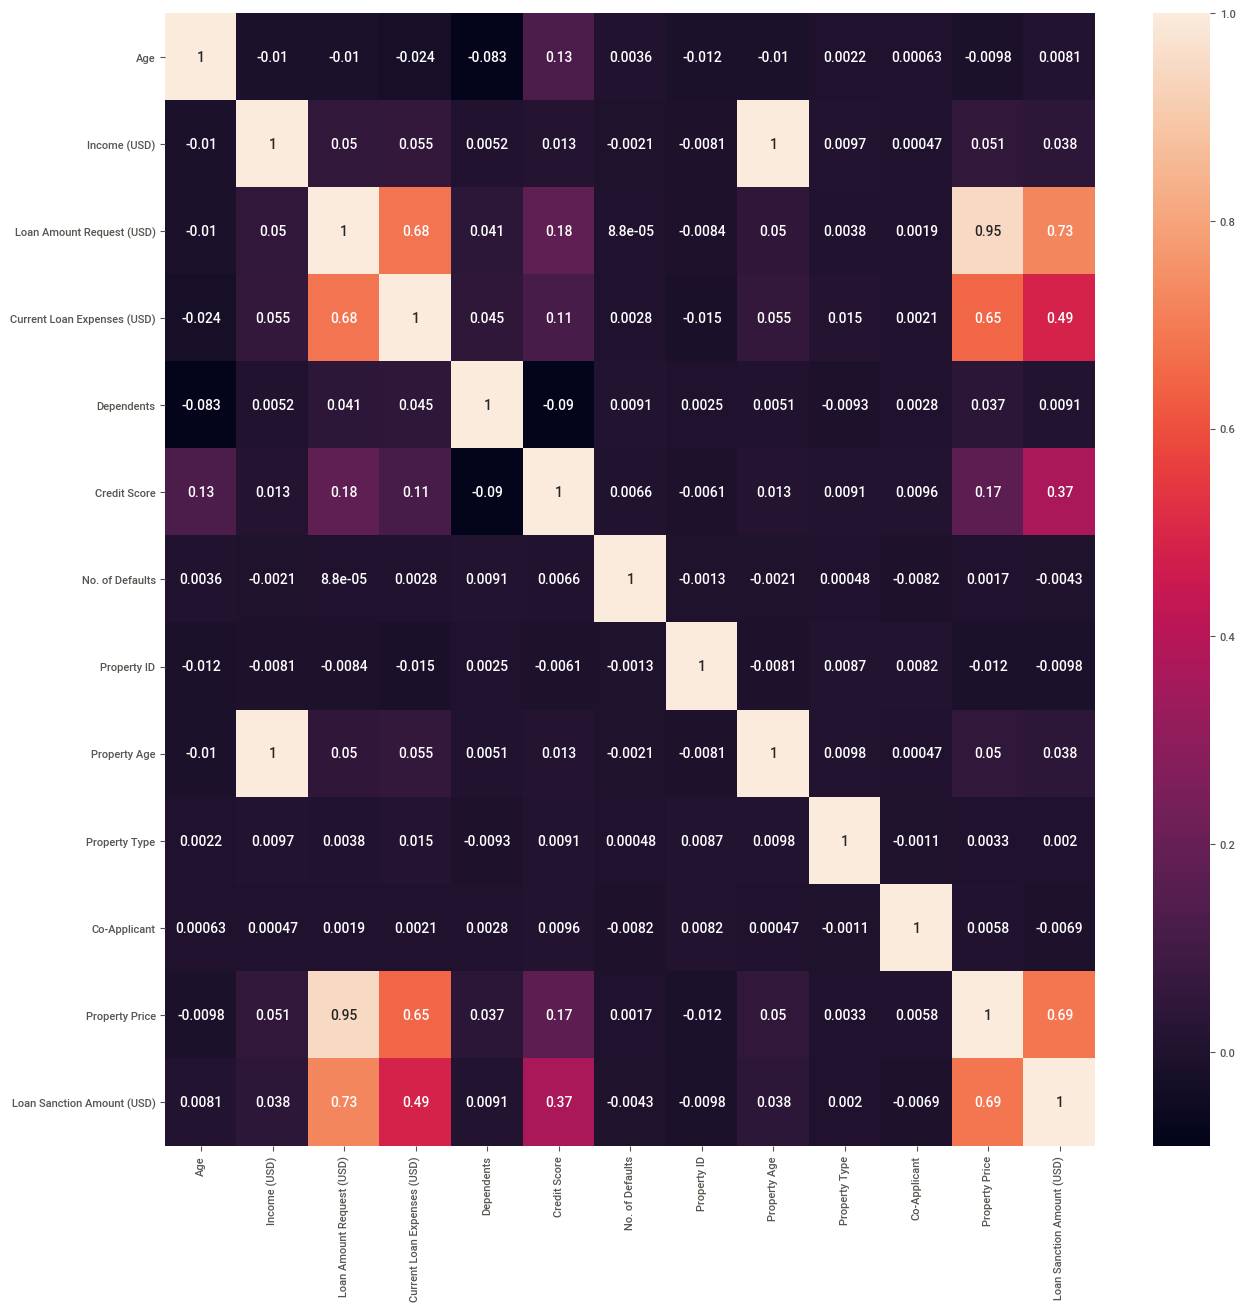

In [17]:
# Making Heatpmap correlation
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True )

### Filling Income_stability null values

In [18]:
train['Profession'].value_counts()

Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: Profession, dtype: int64

In [19]:
train['Income_Stability'] = train['Income Stability']

In [20]:
train.drop(['Income Stability'], axis=1, inplace=True)

<AxesSubplot:xlabel='Profession', ylabel='Loan Sanction Amount (USD)'>

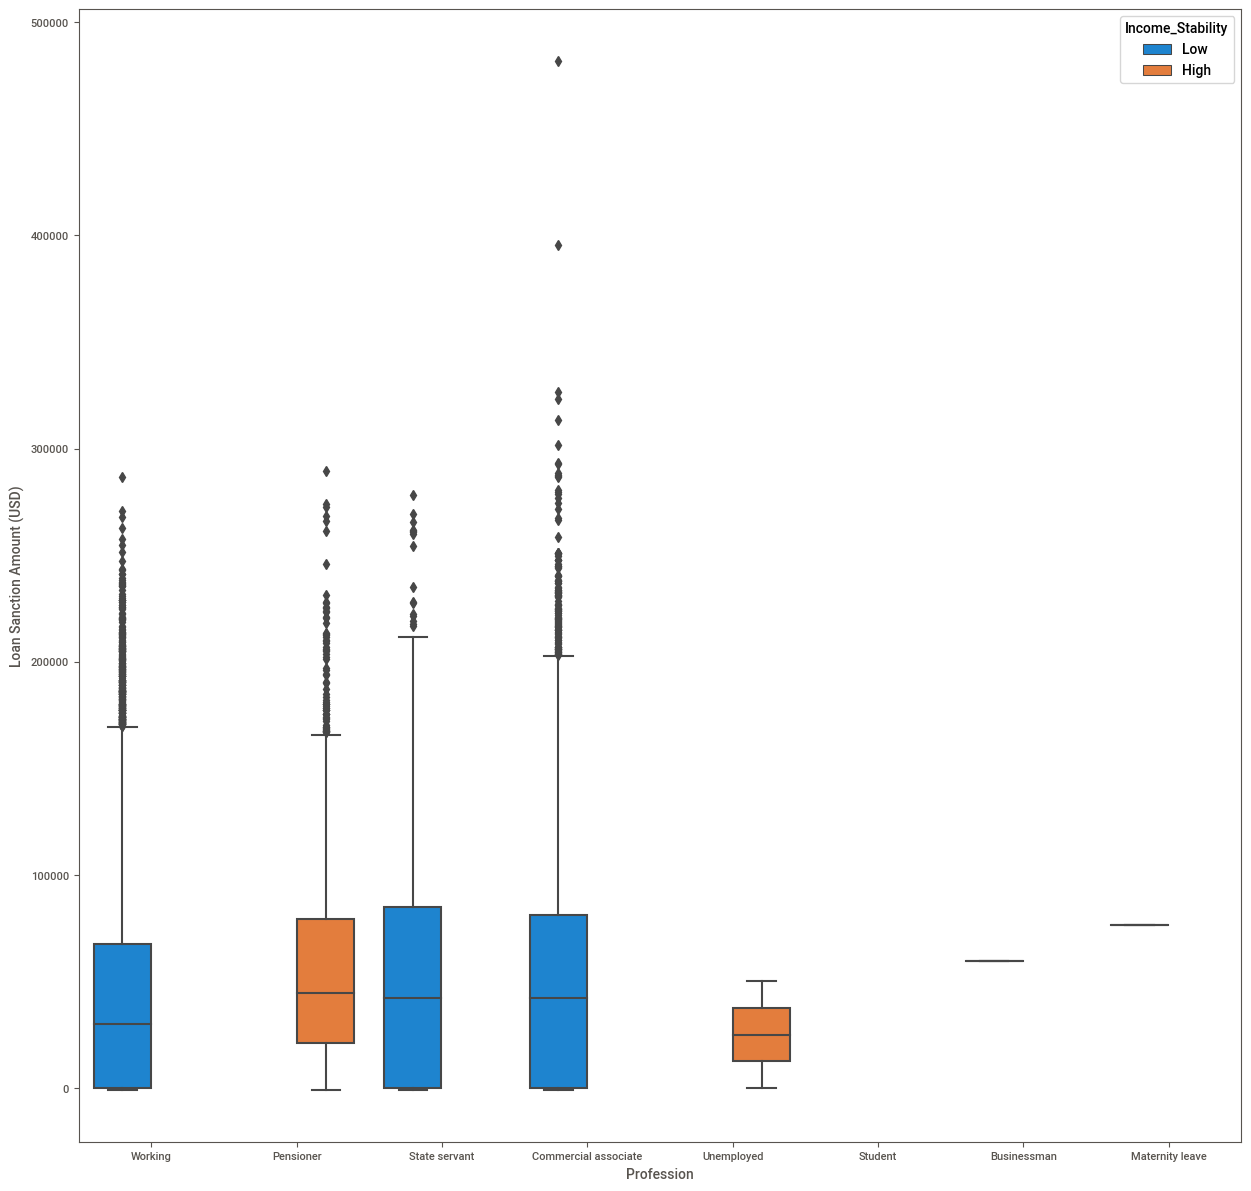

In [21]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Profession', y='Loan Sanction Amount (USD)', hue="Income_Stability", data=train)

In [22]:
def impute_income_stability(cols):
    Income_Stability = cols[0]
    Profession = cols[1]
    
    if pd.isnull(Income_Stability):
        
        if Profession == 'Working':
            return 'Low'
        elif Profession == 'State servant':
            return 'Low'
        elif Profession == 'Commercial associate':
            return 'Low'
        
        else:
            return 'High'
    else:
        return Income_Stability
        

In [23]:
train['Income_Stability'] = train[['Income_Stability', 'Profession']].apply(impute_income_stability, axis =1)

In [24]:
train.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
Income_Stability                  0
dtype: int64

### Filling Type_of_employment null values

In [25]:
train['Type_of_Employment'] = train['Type of Employment']

In [26]:
train.drop(['Type of Employment'],axis=1,inplace=True)

In [27]:
train['Type_of_Employment'].value_counts()

Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: Type_of_Employment, dtype: int64

<AxesSubplot:xlabel='Type_of_Employment', ylabel='Age'>

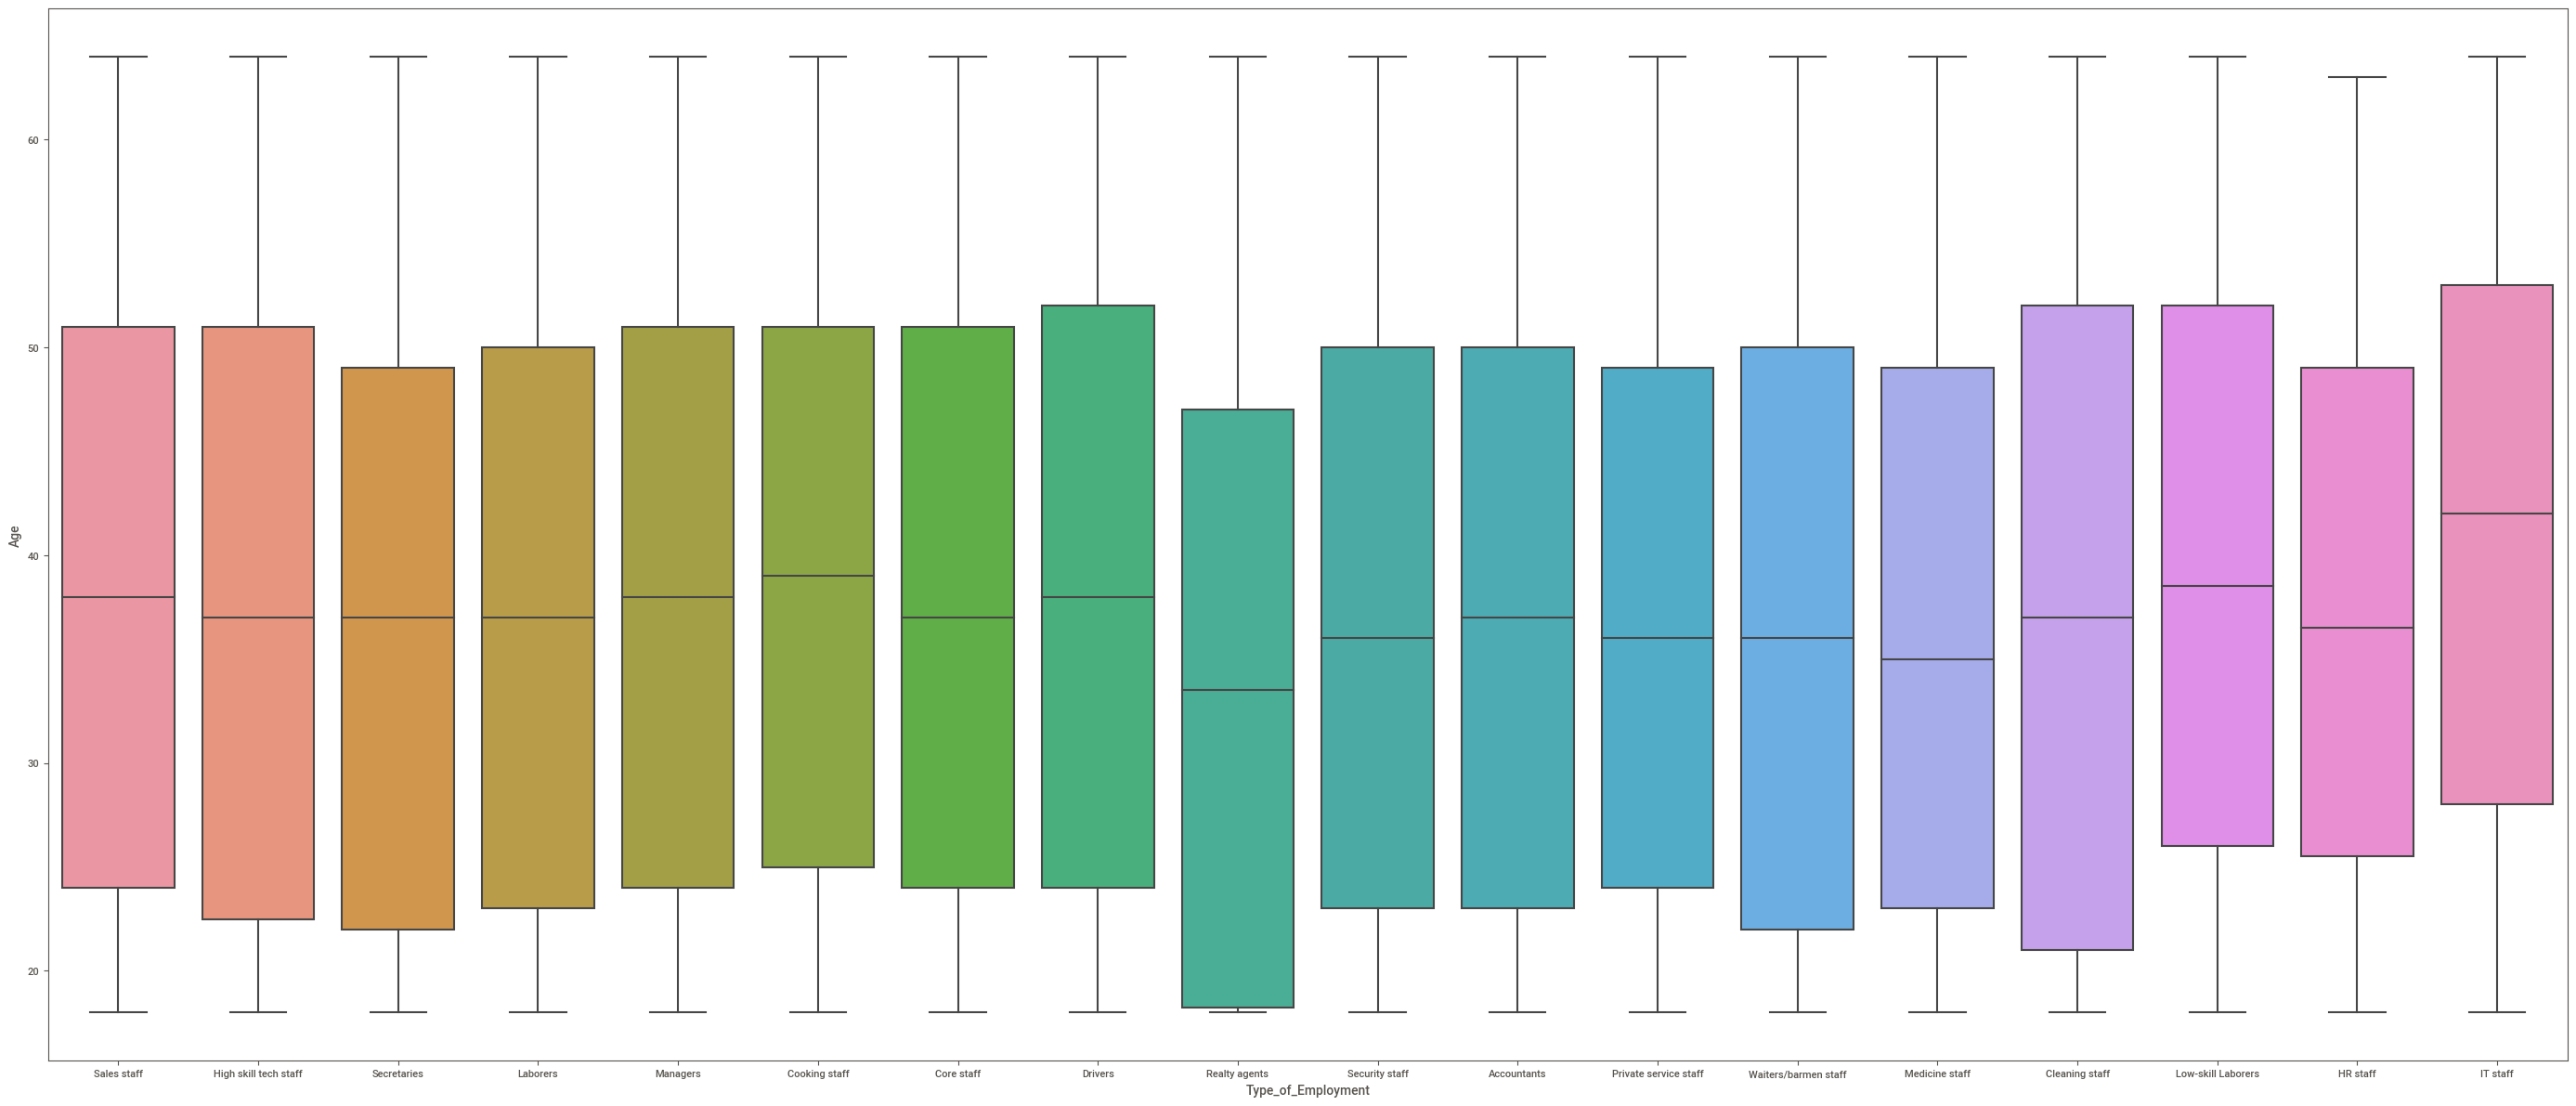

In [28]:
plt.figure(figsize=(35,15))
sns.boxplot(x='Type_of_Employment', y='Age', data=train)

In [29]:
def impute_type_of_employement(cols):
    Type_of_Employment = cols[0]
    Age = cols[1]
    
    if pd.isnull(Type_of_Employment):
        
        if Age == 40:
            return 'IT staff'
        elif Age == 32:
            return 'Realty agents'
        else:
            return 'Laborers'
    else:
        return Type_of_Employment
        

In [30]:
train['Type_of_Employment'] = train[['Type_of_Employment', 'Age']].apply(impute_type_of_employement, axis =1)

In [31]:
train.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling current_loan_expenses null values

In [32]:
train['Current Loan Expenses (USD)'].fillna(train['Current Loan Expenses (USD)'].median(),inplace=True)

In [33]:
train.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling Dependents null values 

In [34]:
train['Dependents'].value_counts()

2.0     13108
3.0      5719
1.0      5544
4.0      2704
5.0       372
6.0        50
7.0         7
8.0         1
14.0        1
10.0        1
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='Loan Sanction Amount (USD)'>

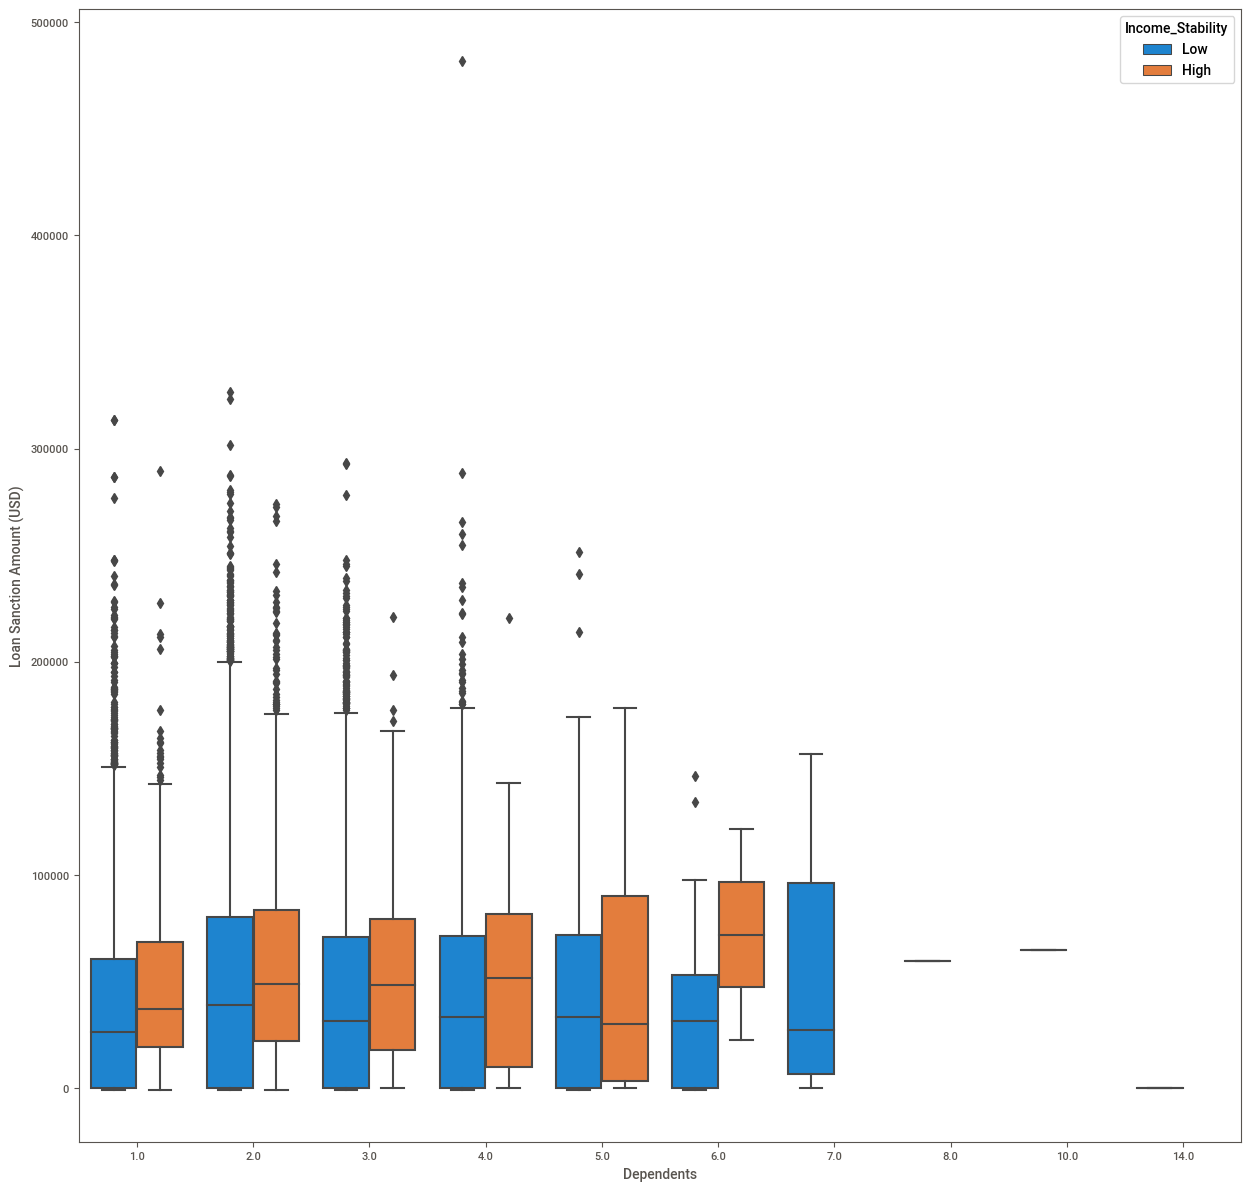

In [35]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Dependents', y='Loan Sanction Amount (USD)', hue="Income_Stability", data=train)

In [36]:
def impute_Dependents(cols):
    Dependents = cols[0]
    Income_Stability = cols[1]
    
    if pd.isnull(Dependents):
        
        if Income_Stability == 'Low':
            return 7.0
        elif Income_Stability == 'Low':
            return 6.0
        
        else:
            return 4.0
    else:
        return Dependents
        

In [37]:
train['Dependents'] = train[['Dependents', 'Income_Stability']].apply(impute_Dependents, axis =1)

In [38]:
train['Dependents'].value_counts()

2.0     13108
3.0      5719
1.0      5544
4.0      2924
7.0      2280
5.0       372
6.0        50
8.0         1
14.0        1
10.0        1
Name: Dependents, dtype: int64

In [39]:
train.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling Credit Score null values

In [40]:
train['Credit Score'] = train['Credit Score'].fillna(train['Credit Score'].mean())

In [41]:
train.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling Has Active Credit Card null values 

In [42]:
train['Expense Type 2'].value_counts()

Y    20180
N     9820
Name: Expense Type 2, dtype: int64

<AxesSubplot:xlabel='Has Active Credit Card', ylabel='Loan Sanction Amount (USD)'>

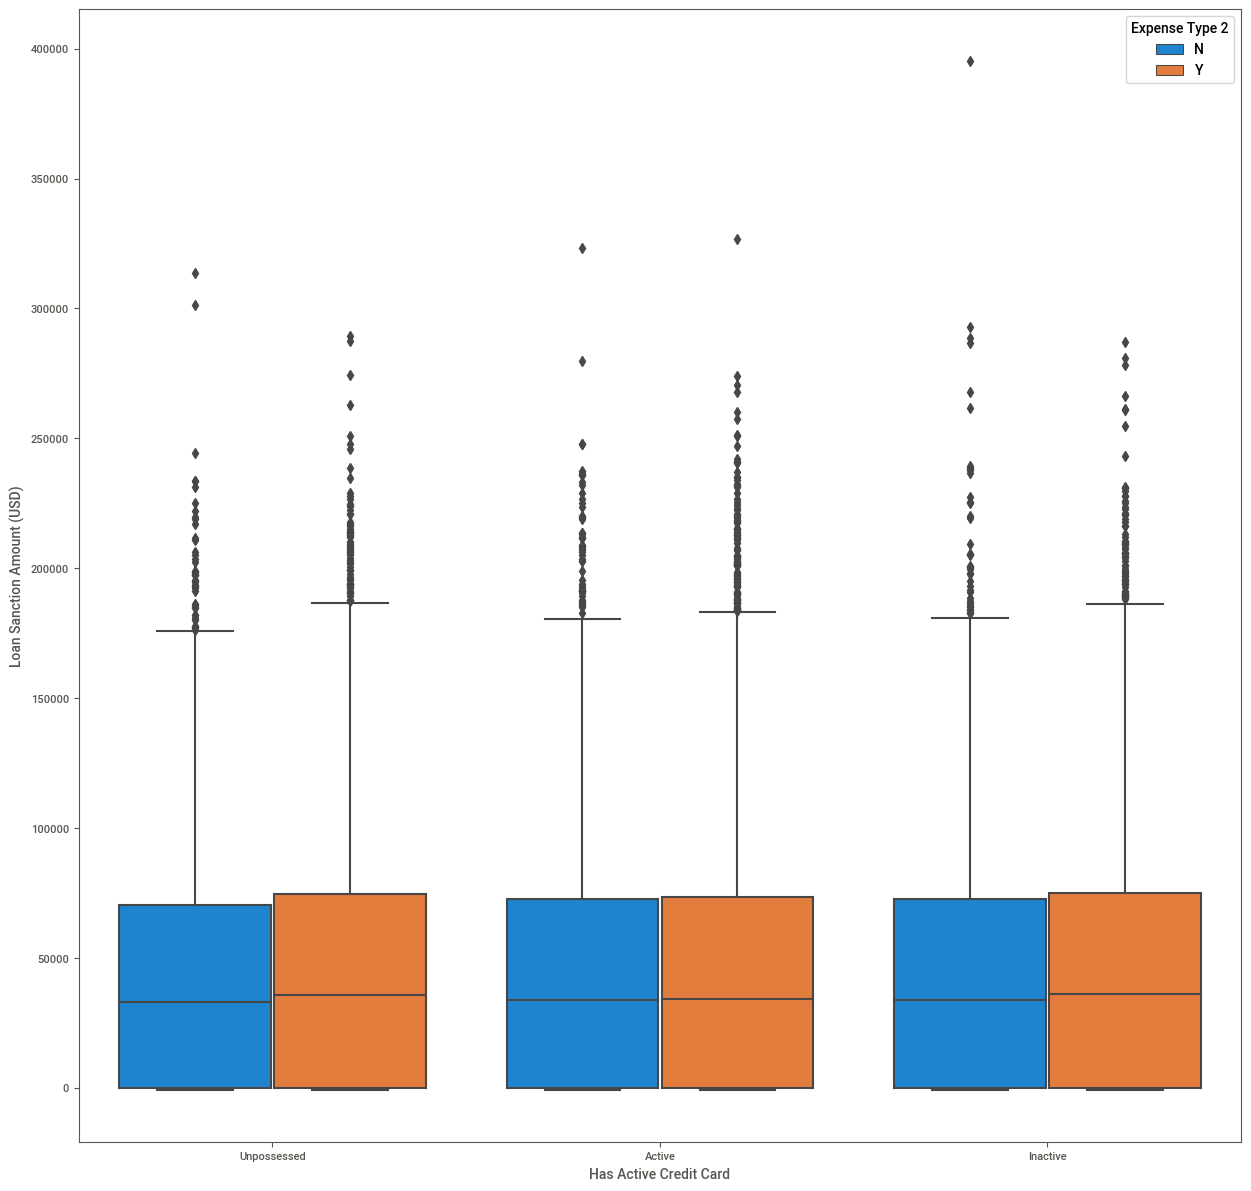

In [43]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Has Active Credit Card', y='Loan Sanction Amount (USD)',hue='Expense Type 2', data=train)

In [44]:
train['Has Active Credit Card'] = train['Has Active Credit Card'].fillna('Active')

In [45]:
train.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling property location null values

In [46]:
train['Property Location'].value_counts()

Semi-Urban    10387
Rural         10041
Urban          9216
Name: Property Location, dtype: int64

In [47]:
train['Property Location']=train['Property Location'].fillna('Semi-Urban')

In [48]:
train.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling age null values

In [49]:
train['Gender'].value_counts()

M    15053
F    14894
Name: Gender, dtype: int64

In [50]:
train['Gender']=train['Gender'].fillna('M')

In [51]:
train.isnull().sum()

Gender                            0
Age                               0
Income (USD)                   4576
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling Loan Sanction Amount null values

<AxesSubplot:xlabel='Type_of_Employment', ylabel='Loan Sanction Amount (USD)'>

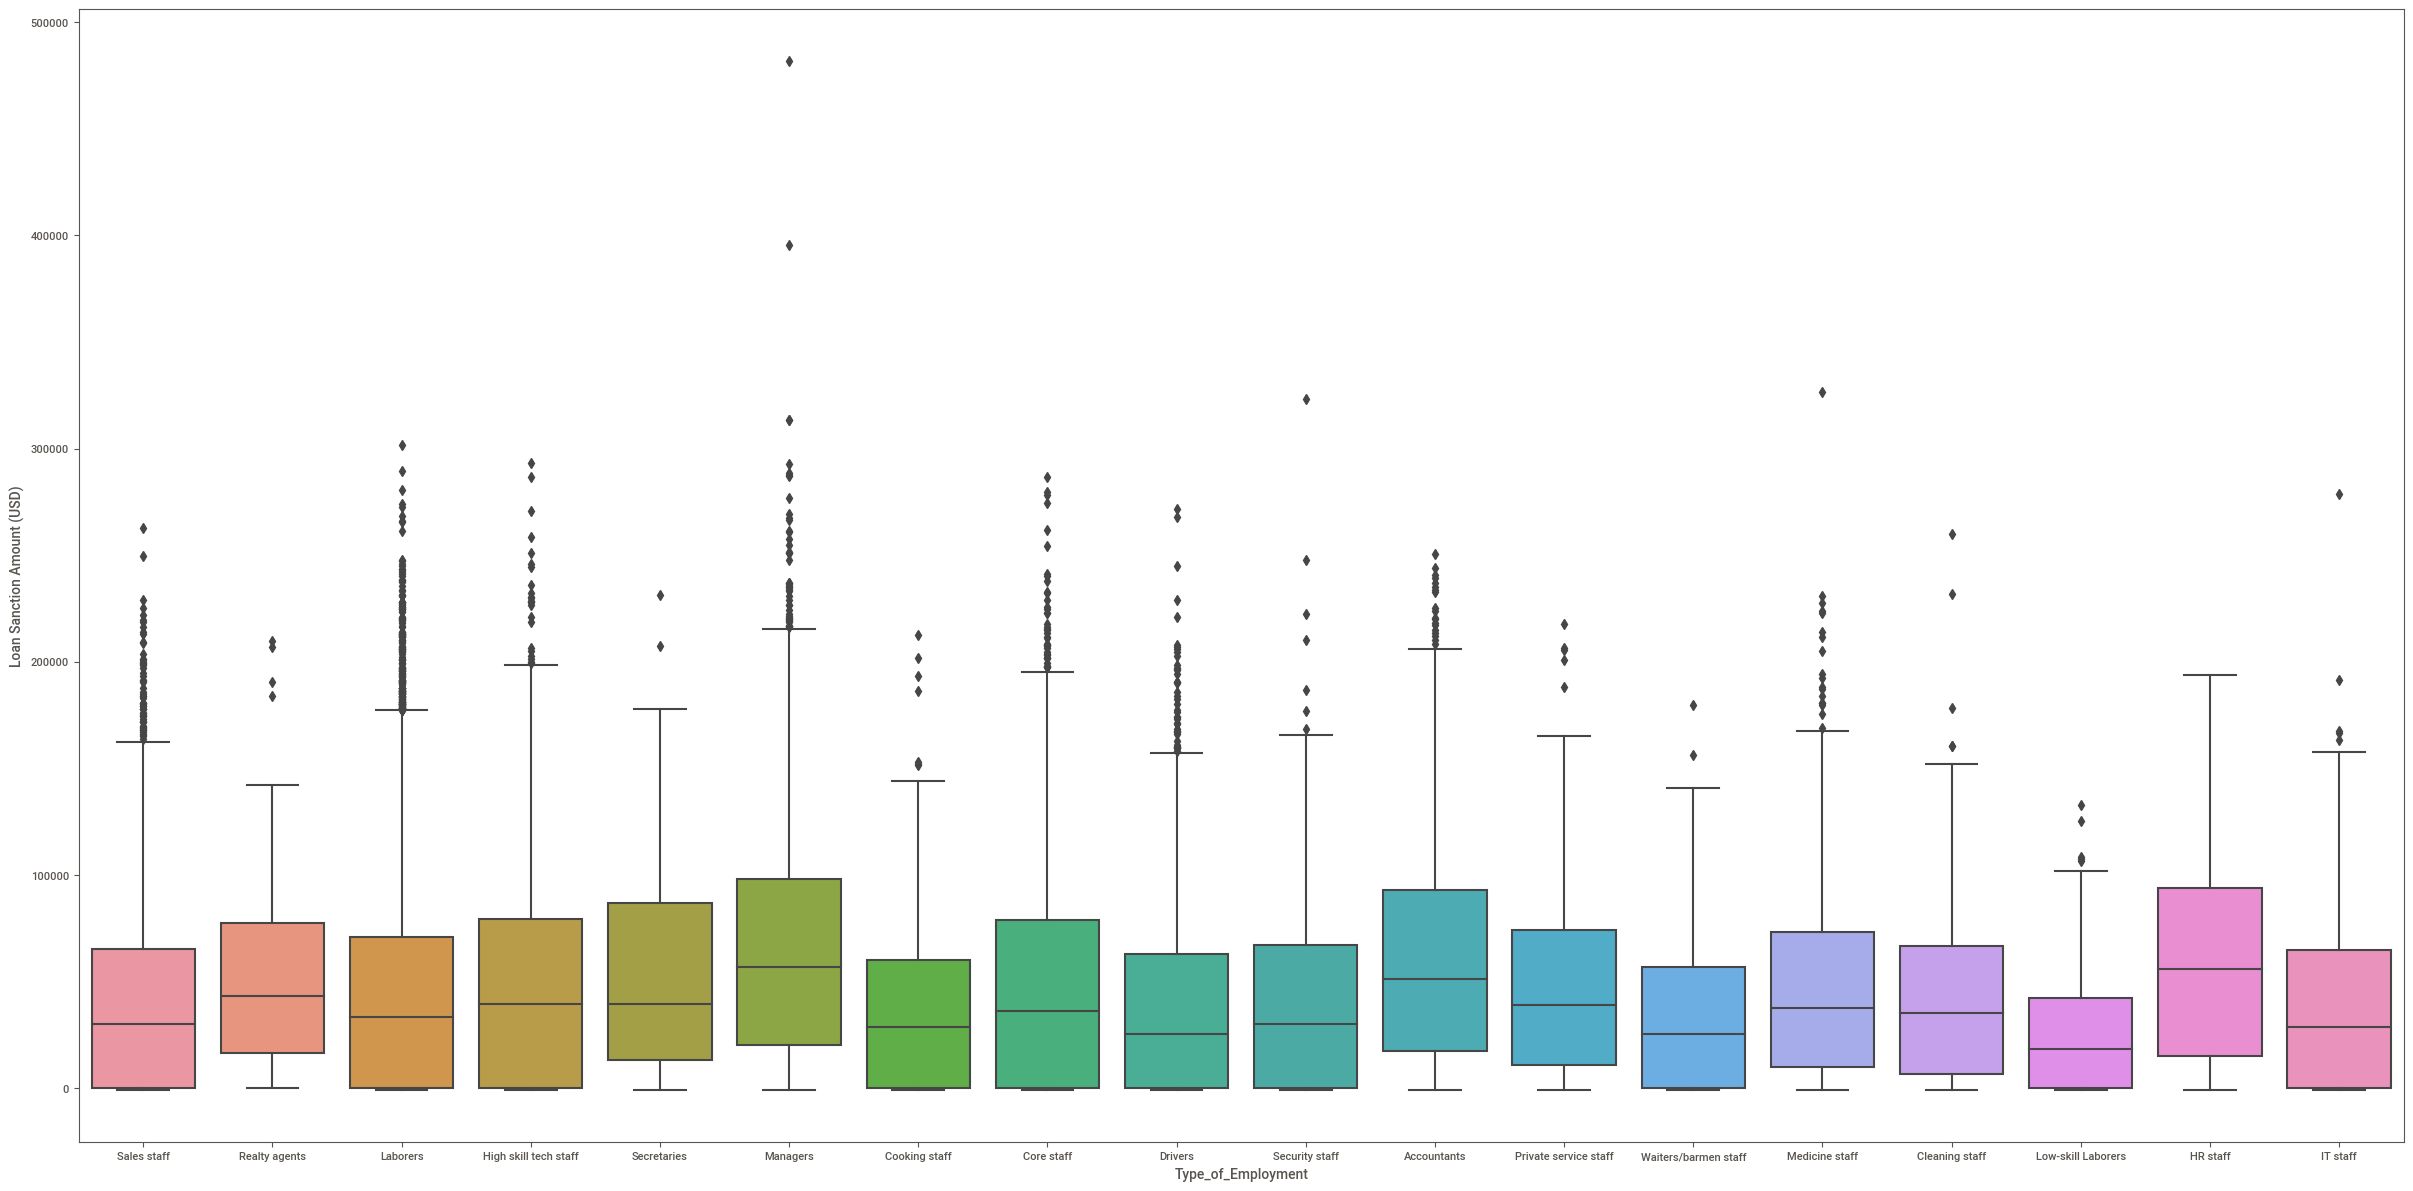

In [52]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Type_of_Employment', y='Loan Sanction Amount (USD)', data=train)

In [53]:
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.789347,2.625500,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,241.856859,1.555805,70.085602,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,248.655000,2.000000,685.415000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.885381,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,520.102500,3.000000,795.140000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [54]:
train['Loan Sanction Amount (USD)'] = train['Loan Sanction Amount (USD)'].fillna(35209.395000)

In [55]:
train.isnull().sum()

Gender                            0
Age                               0
Income (USD)                   4576
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling Income(USD) null values

In [56]:
train['Income (USD)'] = train['Income (USD)'].fillna(2415.7)

In [57]:
train.isnull().sum()

Gender                            0
Age                               0
Income (USD)                      0
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
Income_Stability                  0
Type_of_Employment                0
dtype: int64

### Filling Property Age null values

In [58]:
train['Property Age'] = train['Property Age'].fillna(2415.7)

In [59]:
train.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Profession                     0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
Income_Stability               0
Type_of_Employment             0
dtype: int64

## Now converting Categorical values into numeric using Pandas Dummy function

In [60]:
train_new = pd.get_dummies(train)

In [61]:
train_new

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,...,Type_of_Employment_Laborers,Type_of_Employment_Low-skill Laborers,Type_of_Employment_Managers,Type_of_Employment_Medicine staff,Type_of_Employment_Private service staff,Type_of_Employment_Realty agents,Type_of_Employment_Sales staff,Type_of_Employment_Secretaries,Type_of_Employment_Security staff,Type_of_Employment_Waiters/barmen staff
0,56,1933.05,72809.58,241.08,3.0,809.440000,0,746,1933.05,4,...,0,0,0,0,0,0,1,0,0,0
1,32,4952.91,46837.47,495.81,1.0,780.400000,0,608,4952.91,2,...,0,0,0,0,0,1,0,0,0,0
2,65,988.19,45593.04,171.95,1.0,833.150000,0,546,988.19,2,...,1,0,0,0,0,0,0,0,0,0
3,65,2415.70,80057.92,298.54,2.0,832.700000,1,890,2415.70,2,...,1,0,0,0,0,0,0,0,0,0
4,31,2614.77,113858.89,491.41,7.0,745.550000,1,715,2614.77,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,38,4969.41,76657.90,722.34,2.0,869.610000,0,566,4969.41,4,...,0,0,1,0,0,0,0,0,0,0
29996,20,1606.88,66595.14,253.04,3.0,729.410000,0,175,1606.88,3,...,1,0,0,0,0,0,0,0,0,0
29997,49,2415.70,81410.08,583.11,7.0,739.885381,0,959,2415.70,1,...,0,0,0,0,0,0,1,0,0,0
29998,38,2417.71,142524.10,378.29,3.0,677.270000,1,375,2417.71,4,...,0,0,0,0,0,0,0,0,1,0


## Applying Standard scalar

In [62]:
X = train_new.drop(['Loan Sanction Amount (USD)'], axis=1).values

In [63]:
y=train_new['Loan Sanction Amount (USD)'].values

In [65]:
X_test = pd.read_csv('now__predict.csv')

In [66]:
X_test

,Unnamed: 0,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,...,Type_of_Employment_Laborers,Type_of_Employment_Low-skill Laborers,Type_of_Employment_Managers,Type_of_Employment_Medicine staff,Type_of_Employment_Private service staff,Type_of_Employment_Realty agents,Type_of_Employment_Sales staff,Type_of_Employment_Secretaries,Type_of_Employment_Security staff,Type_of_Employment_Waiters/barmen staff
0,0,47,3472.69,137088.98,396.72,2.0,799.140000,0,843,3472.69,...,0,0,1,0,0,0,0,0,0,0
1,1,57,1184.84,104771.59,463.76,2.0,833.310000,0,22,1184.84,...,0,0,0,0,0,0,1,0,0,0
2,2,52,1266.27,176684.91,493.15,3.0,627.440000,0,1,1266.27,...,1,0,0,0,0,0,0,0,0,0
3,3,65,1369.72,97009.18,446.15,2.0,833.200000,0,730,1369.72,...,1,0,0,0,0,0,0,0,0,0
4,4,60,1939.23,109980.00,370.10,4.0,738.821538,0,356,1939.23,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19,1349.60,156766.97,500.59,4.0,684.320000,0,681,1349.60,...,1,0,0,0,0,0,0,0,0,0
19996,19996,22,2019.78,47924.80,243.02,7.0,706.340000,0,213,2019.78,...,0,0,0,0,0,0,0,0,0,0
19997,19997,19,2252.03,18629.88,101.88,1.0,656.460000,0,270,2252.03,...,0,0,0,0,0,0,0,0,0,0
19998,19998,21,1845.35,95430.73,271.31,2.0,865.460000,0,489,1845.35,...,1,0,0,0,0,0,0,0,0,0


In [67]:
X_test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [68]:
X_test_arr = X_test.values

In [72]:
X_test_arr.shape

(20000, 55)

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test_arr = sc.transform(X_test_arr)

# Making ML MODEL


In [74]:
from sklearn.ensemble import RandomForestRegressor


In [75]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)


In [76]:
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [77]:
y_pred = regressor.predict(X_test_arr)

In [78]:
y_pred

array([93158.225, 53071.86 ,     0.   , ...,  8226.148, 66367.074,
       80444.539])

# Saving prediction to a csv 

In [79]:
gg = pd.read_csv('test.csv')

In [80]:
df=pd.DataFrame(gg['Customer ID'])

In [83]:
df['Loan Sanction Amount (USD)'] = y_pred

In [86]:
df.to_csv('First_submission.csv')